#### Updated: Mar 25, 2022
This scraper was built with capability of selecting different product name

### 1. Pip install, selectorlib

Top Prepority: 
* Product Name ✓
* Price ✓
* Rating (e.g. 4 out of 5) ✓
* Number of reviews ✓
* Sales Rank ✓
* Size if available
* Color if options 
* Materials? 

Second Prepority:
* Short Description
* Full Product Description
* ##Image URLs
* ##Variant ASINs
* Link to all Reviews Page

Final saving file in csv: 

In [2]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
# from msedge.selenium_tools import Edge, EdgeOptions

In [3]:
driver = webdriver.Chrome("/Users/Eric/Downloads/chromedriver")

# options = EdgeOptions()
# options.use_chromium = True 
# driver = Edge(options = options)

# URL setup and HTML request
url = 'https://www.amazon.com'
driver.get(url)

In [52]:
def get_url(search_term):
    # Generate a url from key words
    template = 'https://www.amazon.com/Best-Sellers-Clothing-Shoes-Jewelry-Womens-{}-Handbags/zgbs/fashion/16977746011/ref=zg_bs_nav_fashion_3_16977747011'
    search_term = search_term.replace('','')
    return template.format(search_term)

# E.g. Hobo handbags
url = get_url('Hobo')
print(url)

driver.get(url)
# r = requests.get(url)
#print(r.text)

https://www.amazon.com/Best-Sellers-Clothing-Shoes-Jewelry-Womens-Hobo-Handbags/zgbs/fashion/16977746011/ref=zg_bs_nav_fashion_3_16977747011


In [65]:
# Extract information
soup = BeautifulSoup(driver.page_source, 'html.parser')

In [66]:
# results = soup.find_all('div', {'data-a-card-type': "basic"})

# results = soup.find_all('div', {'class': "_p13n-zg-list-grid-desktop_truncationStyles_p13n-sc-css-line-clamp-3__g3dy1"})

# results = soup.findAll('a', {'class': "a-link-normal"})

# check = []
# for item in soup.find_all('div', attrs = {'id': 'gridItemRoot'}):
#     check.append(item.find('div', attrs = {'class': "a-cardui _p13n-zg-list-grid-desktop_style_grid-cell__1uMOS p13n-grid-content"}).text)

results = soup.find_all('div', {"id": 'gridItemRoot'})

# results = soup.find_all('div', {'class': "zg-grid-general-faceout"})

In [67]:
# Validate True Records
len(results)
# print(results)

50

In [68]:
print(results)

[<div class="a-column a-span12 a-text-center _p13n-zg-list-grid-desktop_style_grid-column__2hIsc" id="gridItemRoot"><div class="a-cardui _p13n-zg-list-grid-desktop_style_grid-cell__1uMOS p13n-grid-content" data-a-card-type="basic"><div class="a-section zg-bdg-ctr"><div class="a-section zg-bdg-body zg-bdg-clr-body aok-float-left"><span class="zg-bdg-text">#1</span></div><div class="a-section zg-bdg-tri zg-bdg-clr-tri aok-float-left"></div></div><div class="zg-grid-general-faceout"><div><a class="a-link-normal" href="/Leather-Shoulder-Dreubea-Capacity-Handbag/dp/B07PZ6X56J/ref=zg_bs_16977746011_1/134-7027976-2797254?pd_rd_i=B07CS9CG1Q&amp;psc=1" role="link" tabindex="-1"><div class="a-section a-spacing-mini _p13n-zg-list-grid-desktop_maskStyle_noop__3Xbw5"><img alt="Women's Soft Faux Leather Tote Shoulder Bag from Dreubea, Big Capacity Tassel Handbag" class="a-dynamic-image p13n-sc-dynamic-image p13n-product-image" data-a-dynamic-image='{"https://images-na.ssl-images-amazon.com/images/I/

In [71]:
# Prototype 
# item = results[0]  # Sequence of 4 for every title
# print(item)

# atag = item.span.div      # Specify html chunk
# atag = atag.text.strip()  # Get texts for title 

# print(atag) 


### Select all 50 items on the first page

1. Create for loop,thru elements associated with its tags
2. If/else on selecting wanted info
3. Append each elements

In [102]:
# testing 
info = []

for d in soup.find_all('div', attrs={"id":'gridItemRoot'}):
    # Product Name
    name = d.find('div', attrs={'class':'a-section a-spacing-mini _p13n-zg-list-grid-desktop_maskStyle_noop__3Xbw5'})
    n = name.find_all('img', alt=True)    
    #print(n[0]['alt'])
    # Stars Rating
    stars = d.find('span', attrs={'class':'a-icon-alt'})
    # Num of Reviews
    users_rated = d.find('span', attrs={'class':'a-size-small'})
    # Price Range
    price = d.find('span', attrs={'class':'a-size-base a-color-price'})  
#     print(price.text)
    
    # New DF
    all_1 = []
    
    if name is not None: 
        all_1.append((n[0]['alt']))
    else: 
        all_1.append("Unknown_product")
    
    if stars is not None: 
        all_1.append(stars.text)
    else: 
        all_1.append("0")
    
    if users_rated is not None:
        all_1.append(users_rated.text)
    else: 
        all_1.append("N/A")
        
    if price is not None: 
        all_1.append(price.text)
    else: 
        all_1.append("N/A")
    
    info.append(all_1)


### Next 

* Flatten the list generated
    * Cleansing potential errors
* Pass it to df
* Store in csv

In [130]:
# Replacing text errors 
info = [[x.replace('\xa0', '') for x in y] for y in info]
info

[["Women's Soft Faux Leather Tote Shoulder Bag from Dreubea, Big Capacity Tassel Handbag",
  '4.2 out of 5 stars',
  '46,127',
  '$10.29-$15.99'],
 ['Women Fashion Handbags Wallet Tote Bag Shoulder Bag Top Handle Satchel Purse Set 4pcs',
  '4.5 out of 5 stars',
  '27,535',
  '$29.99-$39.99'],
 ['Mesh Beach Tote Womens Shoulder Handbag',
  '4.7 out of 5 stars',
  '1,670',
  '$18.90-$19.90'],
 ["Covelin Women's Retro Large Size Canvas Shoulder Bag Hobo Crossbody Handbag Casual Tote",
  '4.5 out of 5 stars',
  '16,965',
  '$8.79-$16.99'],
 ['Nodykka Women Tote Bags Top Handle Satchel Handbags PU Faux Leather Tassel Shoulder Purse',
  '4.2 out of 5 stars',
  '18,039',
  '$7.20-$14.57'],
 ['Handbags for Women Shoulder Bags Tote Satchel Hobo 3pcs Purse Set',
  '4.5 out of 5 stars',
  '26,500',
  '$29.99-$45.99'],
 ['MINTEGRA Women Shoulder Handbag Roomy Multiple Pockets Bag Ladies Crossbody Purse Fashion Tote Top Handle Satchel',
  '4.4 out of 5 stars',
  '8,438',
  '$32.99'],
 ['Women Fashi

In [131]:
# List to df 
df = pd.DataFrame(info, columns = ['Product name','Stars', 'Reviews','Price Range'])
# Assign rank 
df = df.assign(rank = list(range(1,51,1)))
df

,Product name,Stars,Reviews,Price Range,rank
0,Women's Soft Faux Leather Tote Shoulder Bag fr...,4.2 out of 5 stars,"46,127",$10.29-$15.99,1
1,Women Fashion Handbags Wallet Tote Bag Shoulde...,4.5 out of 5 stars,"27,535",$29.99-$39.99,2
2,Mesh Beach Tote Womens Shoulder Handbag,4.7 out of 5 stars,"1,670",$18.90-$19.90,3
3,Covelin Women's Retro Large Size Canvas Should...,4.5 out of 5 stars,"16,965",$8.79-$16.99,4
4,Nodykka Women Tote Bags Top Handle Satchel Han...,4.2 out of 5 stars,"18,039",$7.20-$14.57,5
5,Handbags for Women Shoulder Bags Tote Satchel ...,4.5 out of 5 stars,"26,500",$29.99-$45.99,6
6,MINTEGRA Women Shoulder Handbag Roomy Multiple...,4.4 out of 5 stars,"8,438",$32.99,7
7,Women Fashion Synthetic Leather Handbags Tote ...,4.5 out of 5 stars,"5,378",$31.99-$59.99,8
8,Montana West Tote Bags Large Leather Purses an...,4.3 out of 5 stars,"1,733",$19.99-$37.99,9
9,"TOPDesign Canvas Tote Bride Bag, Inspirational...",4.8 out of 5 stars,110,$17.99-$19.99,10


In [239]:
# df.to_csv('amazon.csv', index = False, encoding = 'utf-8')

## Preliminary Processing


In [145]:
# load in dataset
df1 = pd.read_csv("amazon.csv")

df1.dtypes

# Select first chunk of Stars
df1['Stars'] = df1['Stars'].apply(lambda x: x.split()[0])
df1['Stars'] = pd.to_numeric(df1['Stars'])

df1["Reviews"] = df1["Reviews"].str.replace(',', '')
df1['Reviews'] = pd.to_numeric(df1['Reviews'])

In [188]:
# Lowest Price data set

,Product name,Stars,Reviews,Price Range,rank
0,Women's Soft Faux Leather Tote Shoulder Bag fr...,4.2,46127,$10.29-$15.99,1
1,Women Fashion Handbags Wallet Tote Bag Shoulde...,4.5,27535,$29.99-$39.99,2
2,Mesh Beach Tote Womens Shoulder Handbag,4.7,1670,$18.90-$19.90,3
3,Covelin Women's Retro Large Size Canvas Should...,4.5,16965,$8.79-$16.99,4
4,Nodykka Women Tote Bags Top Handle Satchel Han...,4.2,18039,$7.20-$14.57,5
5,Handbags for Women Shoulder Bags Tote Satchel ...,4.5,26500,$29.99-$45.99,6
6,MINTEGRA Women Shoulder Handbag Roomy Multiple...,4.4,8438,$32.99,7
7,Women Fashion Synthetic Leather Handbags Tote ...,4.5,5378,$31.99-$59.99,8
8,Montana West Tote Bags Large Leather Purses an...,4.3,1733,$19.99-$37.99,9
9,"TOPDesign Canvas Tote Bride Bag, Inspirational...",4.8,110,$17.99-$19.99,10


In [184]:
test = []
for x in df1['Price Range']:
    if '-' in x:
        test.append(x.split('-')[0])
    else:
        test.append(x)

In [203]:
new = pd.DataFrame(test, columns = ['Low Price'])

All = pd.merge(df1, new, left_index=True, right_index = True)

In [186]:
# Highest price 
test2 = []
for x in df1['Price Range']:
    if '-' in x:
        test2.append(x.split('-')[1])
    else:
        test2.append(x)

In [205]:
new_1 = pd.DataFrame(test2, columns = ['High Price'])

All = pd.merge(All, new_1, left_index=True, right_index = True)

In [206]:
All

,Product name,Stars,Reviews,Price Range,rank,Low Price,High Price
0,Women's Soft Faux Leather Tote Shoulder Bag fr...,4.2,46127,$10.29-$15.99,1,$10.29,$15.99
1,Women Fashion Handbags Wallet Tote Bag Shoulde...,4.5,27535,$29.99-$39.99,2,$29.99,$39.99
2,Mesh Beach Tote Womens Shoulder Handbag,4.7,1670,$18.90-$19.90,3,$18.90,$19.90
3,Covelin Women's Retro Large Size Canvas Should...,4.5,16965,$8.79-$16.99,4,$8.79,$16.99
4,Nodykka Women Tote Bags Top Handle Satchel Han...,4.2,18039,$7.20-$14.57,5,$7.20,$14.57
5,Handbags for Women Shoulder Bags Tote Satchel ...,4.5,26500,$29.99-$45.99,6,$29.99,$45.99
6,MINTEGRA Women Shoulder Handbag Roomy Multiple...,4.4,8438,$32.99,7,$32.99,$32.99
7,Women Fashion Synthetic Leather Handbags Tote ...,4.5,5378,$31.99-$59.99,8,$31.99,$59.99
8,Montana West Tote Bags Large Leather Purses an...,4.3,1733,$19.99-$37.99,9,$19.99,$37.99
9,"TOPDesign Canvas Tote Bride Bag, Inspirational...",4.8,110,$17.99-$19.99,10,$17.99,$19.99


In [240]:
All.to_csv('amazon_data.csv', index = False, encoding = 'utf-8')

### Some Visuals

In [208]:
from bokeh.models import ColumnDataSource
from bokeh.transform import dodge
import math
from bokeh.io import curdoc
curdoc().clear()
from bokeh.io import push_notebook, show, output_notebook
from bokeh.layouts import row
from bokeh.plotting import figure
from bokeh.transform import factor_cmap
from bokeh.models import Legend
from bokeh.transform import factor_cmap
from bokeh.models import Legend
from bokeh.palettes import Dark2_5 as palette
import itertools
from bokeh.palettes import d3

In [209]:
colors = itertools.cycle(palette)
palette = d3['Category20'][20]


In [220]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

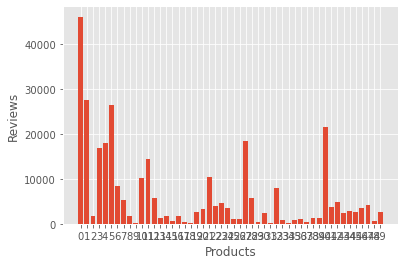

In [238]:
x_pos = [i for i, _ in enumerate(All['Product name'])]

plt.bar(x_pos, All['Reviews'])
plt.xlabel("Products")
plt.ylabel("Reviews")
plt.title("")

plt.xticks(x_pos)

plt.show()

In [234]:
All.sort_values('Reviews')['Reviews'].tail(10)

10    10123
21    10367
11    14376
3     16965
4     18039
27    18417
40    21480
5     26500
1     27535
0     46127
Name: Reviews, dtype: int64